# Automate Data Visualization with LLM 

# Table of Contents

1. [How to Automate Data Visualization with AI](#make-a-data-visualization-agent)
2. [Load Libraries](#load-libraries)
3. [Setup AI and Logging](#setup-ai-and-logging)
4. [Load a Dataset](#load-a-dataset)
5. [Create The Agent](#create-the-agent)
6. [Response](#response)
7. [The data visualization](#the-data-visualization)
8. [Data Visualization Function](#data-visualization-function)

### Load Libraries <a id="load-libraries"></a>

In [10]:
import sys
sys.path.append('..')

In [11]:
# * Libraries
import os, pandas as pd
from pprint import pprint

from langchain_openai import ChatOpenAI
from DAPCOR.agents import DataVisualizationAgent
from DAPCOR.utils.plotly import plotly_from_dict

### Setup AI and Logging <a id="setup-ai-and-logging"></a>

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files . 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [12]:
# load API and create llm object
MODEL    = "gpt-4o-mini"
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

llm = ChatOpenAI(model = MODEL)
llm

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x00000190A36BCF20>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x00000190A391E840>, root_client=<openai.OpenAI object at 0x00000190A36BE9F0>, root_async_client=<openai.AsyncOpenAI object at 0x00000190A391C890>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Load a Dataset <a id="load-a-dataset"></a>

Next, let's load the FCC unit process data from a CSV file 

In [13]:
csv_path = os.path.join("..", "data", "FCCU.csv")
df = pd.read_csv(csv_path)
df

,Fresh feed flow,Ambient temperature,Feed temperature,Reactor pressure,Regenerator pressure,Furnace temperature,Reactor feed temperature,Regenerator temperature,Catalyst level,Stack gas temperature,...,Reactor temperature controller valve opening,Ampearage combustion air blower,Ampearage wet gas blower,Furnace fuel flowrate,Combustion air flowrate,LPG flowrate,Light cycle oil flowrate,Reflux flowrate,Overhead fractionator temperature,Fractionator temperature controller valve opening
0,165.00,75.014,460.90,34.4,28,1564.1,616.00,1250.0,29.684,1255.3,...,45.302,277.72,198.71,1990.5,3734.7,2933.9,1643.4,2945.5,310.71,49.530
1,165.06,75.043,460.75,34.4,28,1565.3,615.99,1250.0,29.673,1255.3,...,45.312,277.75,198.75,1993.6,3734.8,2934.7,1643.3,2945.8,310.72,49.532
2,165.02,75.045,460.88,34.4,28,1564.3,616.00,1250.0,29.679,1255.3,...,45.306,277.76,198.76,1991.1,3734.9,2934.8,1643.3,2946.0,310.73,49.535
3,164.96,75.044,460.77,34.4,28,1564.6,616.00,1250.0,29.688,1255.3,...,45.298,277.76,198.76,1991.8,3734.8,2934.8,1643.3,2946.1,310.73,49.536
4,164.92,75.049,460.84,34.4,28,1563.9,616.00,1250.0,29.696,1255.3,...,45.291,277.75,198.77,1990.2,3734.5,2934.9,1643.3,2946.1,310.74,49.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,165.21,75.089,460.57,34.4,28,1567.4,616.00,1250.0,29.667,1255.3,...,45.345,278.09,198.97,1998.7,3740.5,2938.4,1642.2,2950.1,310.83,49.585
10076,165.14,75.056,460.42,34.4,28,1567.9,616.00,1250.0,29.688,1255.3,...,45.330,278.08,198.95,1999.9,3740.8,2938.1,1642.5,2950.9,310.83,49.599
10077,165.24,75.067,460.39,34.4,28,1568.7,615.99,1249.9,29.683,1255.3,...,45.339,278.11,198.99,2001.8,3741.3,2938.9,1642.9,2951.8,310.83,49.614
10078,165.15,75.030,460.43,34.4,28,1567.9,616.00,1250.0,29.705,1255.3,...,45.322,278.09,198.97,1999.9,3741.5,2938.5,1643.4,2952.5,310.83,49.626


### Create The Agent <a id="create-the-agent"></a>

Run this code to create an agent with `DataVisualizationAgent()`.

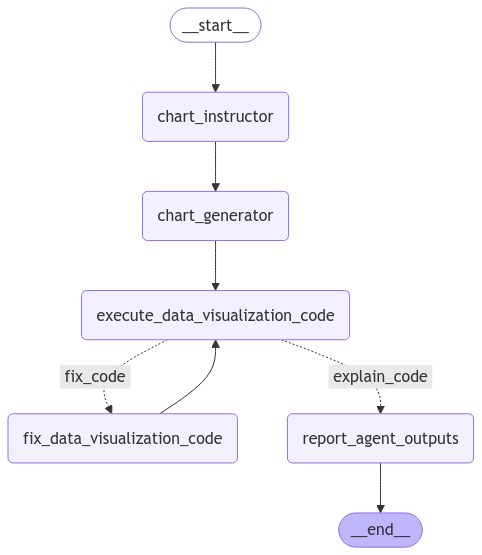

In [14]:
LOG      = True
LOG_PATH = os.path.join("..", "logs/")

data_visualization_agent = DataVisualizationAgent(
    model = llm,
    log = LOG,
    log_path = LOG_PATH
)

data_visualization_agent

## Run the Agent

This creates an `app`, which is a langgraph agent with the main inputs:

- **data_raw**: pd.DataFrame; the raw dataset to be visualized. 
- **user_instructions**: What specific visualization you want the agent to create. 
- **max_retries**: Used to limit the number of attempts to fix visualization code generated by the agent. Set this to 3 to limit to 3 attempts. 
- **retry_count**: Set this to 0. 

In [15]:

data_visualization_agent.invoke_agent(
    data_raw=df, 
    user_instructions="Make a plot of furnace temperature vs fresh feed flow",
    max_retries=3,
    retry_count=0,
)

---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: ..\logs/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS


### Response <a id="response"></a>

The response produced contains everything we need to understand the data visualization decisions made and get the plotly graph. 

In [16]:
response = data_visualization_agent.get_response()
list(response.keys())

['messages',
 'user_instructions',
 'recommended_steps',
 'data_raw',
 'plotly_graph',
 'all_datasets_summary',
 'data_visualization_function',
 'data_visualization_function_path',
 'data_visualization_function_file_name',
 'data_visualization_function_name',
 'data_visualization_error',
 'max_retries',
 'retry_count']

### The data visualization <a id="the-data-visualization"></a>

In [17]:
data_visualization_agent.get_plotly_graph()

#### Data Visualization Function <a id="data-visualization-function"></a>

In [18]:
data_visualization_agent.get_data_visualization_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_visualization_agent
# Time Created: 2025-01-31 23:59:00

def data_visualization(data_raw):
    import pandas as pd
    import numpy as np
    import json
    import plotly.express as px
    import plotly.graph_objects as go
    import plotly.io as pio






    # Prepare data
    fresh_feed_flow = data_raw['Fresh feed flow']
    furnace_temperature = data_raw['Furnace temperature']

    # Create a scatter plot with a trendline
    fig = px.scatter(
        x=fresh_feed_flow,
        y=furnace_temperature,
        trendline='lowess',
        labels={
            'x': 'Fresh Feed Flow (float)',
            'y': 'Furnace Temperature (°C)'
        },
        title='Furnace Temperature vs Fresh Feed Flow'
    )

    # Update layout
    fig.update_traces(marker_color='#3381ff', marker=dict(size=5))
    fig.update_layout(
        template='plotly_white',
        title_font=dict(size=13.2),
        xaxis=dict(tickfont=dict(size=8.8), title_font=dict(size=8.8), linecolor='black', linewidth=0.65),
        yaxis=dict(tickfont=dict(size=8.8), title_font=dict(size=8.8), linecolor='black', linewidth=0.65),
        hoverlabel=dict(font_size=8.8)
    )
    
    # Convert to JSON
    fig_json = pio.to_json(fig)
    fig_dict = json.loads(fig_json)
    
    return fig_dict
```